In [1]:
import pandas as pd
import json
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

In [2]:
data16 = pd.read_pickle('G_ripple_data16.pkl')

In [3]:
data16.head(2)

,matched_group,WinnerID,first_awardYear,Level,yearlymat,delta_C_ITE
0,132755,1,2008,level_0,"[0, 0, 0, 0, 1, 5, 5, 2, 1, 3]",0.954243
1,107078,1,2008,level_0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",0.000000


In [4]:
mean_values = data16.groupby('Level')['delta_C_ITE'].mean()
mean_values

Level
level_0    0.141566
level_1    0.052718
level_2    0.023774
level_3    0.013604
Name: delta_C_ITE, dtype: float64

In [5]:
error_bars = data16.groupby('Level')['delta_C_ITE'].apply(lambda x: 1.96 * np.std(x) / np.sqrt(len(x)))
error_bars

Level
level_0    0.014361
level_1    0.003416
level_2    0.002163
level_3    0.004843
Name: delta_C_ITE, dtype: float64

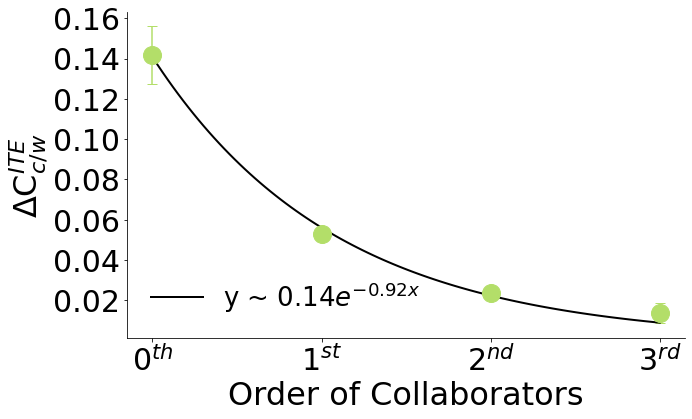

In [6]:
from scipy.optimize import curve_fit
levels = np.array([0, 1, 2, 3])
values = np.array([0.141566, 0.052718, 0.023774, 0.013604])
error_bars = np.array([0.014361, 0.003416, 0.002163, 0.004843])
def exponential_func(x, a, b):
    return a * np.exp(b * x)
params, covariance = curve_fit(exponential_func, levels, values)
a, b = params
x_fit = np.linspace(0, 3, 100)
y_fit = exponential_func(x_fit, a, b)
plt.figure(figsize=(10, 6))
plt.errorbar(levels, values, yerr=error_bars, fmt='o', color='#B3DE69', markersize=18, capsize=5,capthick=1)
plt.plot(x_fit, y_fit, label=f'y ~ ${a:.2f}  e^{{{b:.2f} x}}$',  color='black', linewidth=2)
plt.yticks(fontsize=30)
plt.xticks([0, 1, 2, 3],["$0^{th}$","$1^{st}$","$2^{nd}$","$3^{rd}$"], fontsize=30)
plt.xlabel("Order of Collaborators", fontsize=32)
plt.ylabel(r"ΔC$^{ITE}_{c/w}$", fontsize=32)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.legend(fontsize=26, loc='lower left', bbox_to_anchor=(0, 0), frameon=False)
plt.show()